## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import californiaDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
X,Y = californiaDataset.california_data()
n_features = 8 
n_samples = 20640
n_target = 1 

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              3181.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):                        0.00
Time:                        18:39:29   Log-Likelihood:                         -15801.
No. Observations:               16512   AIC:                                  3.162e+04
Df Residuals:                   16504   BIC:                                  3.168e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

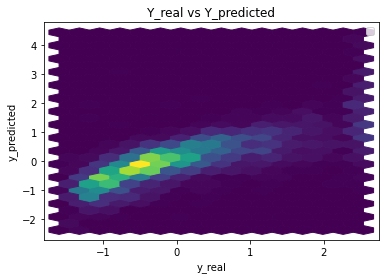

Performance Metrics
Mean Squared Error: 0.38130925996766946
Mean Absolute Error: 0.45439288561628977
Manhattan distance: 1875.7338318240502
Euclidean distance: 39.67423124833727


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.35630963330799686


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.064294
0:	learn: 0.9683618	total: 61ms	remaining: 1m
1:	learn: 0.9363984	total: 63.7ms	remaining: 31.8s
2:	learn: 0.9062305	total: 67.2ms	remaining: 22.3s
3:	learn: 0.8784800	total: 70.3ms	remaining: 17.5s
4:	learn: 0.8528527	total: 72.6ms	remaining: 14.5s
5:	learn: 0.8293073	total: 75.2ms	remaining: 12.5s
6:	learn: 0.8066091	total: 77.7ms	remaining: 11s
7:	learn: 0.7860238	total: 80.1ms	remaining: 9.94s
8:	learn: 0.7686534	total: 83ms	remaining: 9.13s
9:	learn: 0.7495971	total: 85.2ms	remaining: 8.44s
10:	learn: 0.7332326	total: 87.6ms	remaining: 7.88s
11:	learn: 0.7180012	total: 90.3ms	remaining: 7.43s
12:	learn: 0.7040534	total: 92.7ms	remaining: 7.04s
13:	learn: 0.6911152	total: 95.3ms	remaining: 6.71s
14:	learn: 0.6799528	total: 97.6ms	remaining: 6.41s
15:	learn: 0.6692564	total: 99.9ms	remaining: 6.14s
16:	learn: 0.6595924	total: 102ms	remaining: 5.91s
17:	learn: 0.6494853	total: 105ms	remaining: 5.71s
18:	learn: 0.6397393	total: 107ms	remaining: 5.53s
19:	

27:	learn: 0.5788391	total: 128ms	remaining: 4.45s
28:	learn: 0.5725647	total: 131ms	remaining: 4.37s
29:	learn: 0.5665946	total: 134ms	remaining: 4.33s
30:	learn: 0.5631108	total: 136ms	remaining: 4.26s
31:	learn: 0.5585572	total: 139ms	remaining: 4.19s
32:	learn: 0.5530049	total: 141ms	remaining: 4.14s
33:	learn: 0.5499228	total: 144ms	remaining: 4.08s
34:	learn: 0.5456686	total: 146ms	remaining: 4.03s
35:	learn: 0.5423747	total: 149ms	remaining: 3.98s
36:	learn: 0.5394209	total: 151ms	remaining: 3.93s
37:	learn: 0.5358317	total: 153ms	remaining: 3.88s
38:	learn: 0.5333268	total: 156ms	remaining: 3.83s
39:	learn: 0.5309035	total: 158ms	remaining: 3.79s
40:	learn: 0.5286899	total: 161ms	remaining: 3.75s
41:	learn: 0.5267653	total: 163ms	remaining: 3.71s
42:	learn: 0.5237323	total: 165ms	remaining: 3.68s
43:	learn: 0.5212088	total: 168ms	remaining: 3.65s
44:	learn: 0.5194470	total: 170ms	remaining: 3.61s
45:	learn: 0.5178941	total: 172ms	remaining: 3.57s
46:	learn: 0.5143711	total: 175

54:	learn: 0.4985184	total: 196ms	remaining: 3.36s
55:	learn: 0.4972672	total: 198ms	remaining: 3.34s
56:	learn: 0.4952472	total: 200ms	remaining: 3.31s
57:	learn: 0.4934017	total: 203ms	remaining: 3.29s
58:	learn: 0.4915625	total: 205ms	remaining: 3.27s
59:	learn: 0.4906272	total: 208ms	remaining: 3.26s
60:	learn: 0.4892993	total: 211ms	remaining: 3.24s
61:	learn: 0.4883405	total: 214ms	remaining: 3.24s
62:	learn: 0.4872760	total: 216ms	remaining: 3.22s
63:	learn: 0.4854235	total: 219ms	remaining: 3.2s
64:	learn: 0.4842098	total: 221ms	remaining: 3.18s
65:	learn: 0.4835098	total: 224ms	remaining: 3.17s
66:	learn: 0.4822497	total: 226ms	remaining: 3.15s
67:	learn: 0.4816022	total: 228ms	remaining: 3.13s
68:	learn: 0.4797965	total: 231ms	remaining: 3.11s
69:	learn: 0.4783924	total: 233ms	remaining: 3.1s
70:	learn: 0.4772865	total: 235ms	remaining: 3.08s
71:	learn: 0.4756318	total: 238ms	remaining: 3.07s
72:	learn: 0.4749489	total: 240ms	remaining: 3.05s
73:	learn: 0.4741456	total: 243ms

106:	learn: 0.4488949	total: 325ms	remaining: 2.71s
107:	learn: 0.4481620	total: 327ms	remaining: 2.7s
108:	learn: 0.4476202	total: 329ms	remaining: 2.69s
109:	learn: 0.4470466	total: 332ms	remaining: 2.68s
110:	learn: 0.4460356	total: 334ms	remaining: 2.67s
111:	learn: 0.4454641	total: 336ms	remaining: 2.67s
112:	learn: 0.4446091	total: 339ms	remaining: 2.66s
113:	learn: 0.4440255	total: 341ms	remaining: 2.65s
114:	learn: 0.4432482	total: 343ms	remaining: 2.64s
115:	learn: 0.4426354	total: 345ms	remaining: 2.63s
116:	learn: 0.4422903	total: 348ms	remaining: 2.62s
117:	learn: 0.4418540	total: 350ms	remaining: 2.62s
118:	learn: 0.4413608	total: 353ms	remaining: 2.61s
119:	learn: 0.4410018	total: 355ms	remaining: 2.6s
120:	learn: 0.4405135	total: 358ms	remaining: 2.6s
121:	learn: 0.4402356	total: 360ms	remaining: 2.59s
122:	learn: 0.4396777	total: 363ms	remaining: 2.58s
123:	learn: 0.4390755	total: 365ms	remaining: 2.58s
124:	learn: 0.4385703	total: 368ms	remaining: 2.58s
125:	learn: 0.4

134:	learn: 0.4333663	total: 392ms	remaining: 2.51s
135:	learn: 0.4329180	total: 395ms	remaining: 2.51s
136:	learn: 0.4326429	total: 397ms	remaining: 2.5s
137:	learn: 0.4322838	total: 399ms	remaining: 2.49s
138:	learn: 0.4316688	total: 401ms	remaining: 2.49s
139:	learn: 0.4314110	total: 404ms	remaining: 2.48s
140:	learn: 0.4307882	total: 406ms	remaining: 2.47s
141:	learn: 0.4301708	total: 408ms	remaining: 2.46s
142:	learn: 0.4296777	total: 410ms	remaining: 2.46s
143:	learn: 0.4290388	total: 413ms	remaining: 2.45s
144:	learn: 0.4286560	total: 415ms	remaining: 2.45s
145:	learn: 0.4283201	total: 418ms	remaining: 2.44s
146:	learn: 0.4277804	total: 420ms	remaining: 2.44s
147:	learn: 0.4268024	total: 422ms	remaining: 2.43s
148:	learn: 0.4262916	total: 425ms	remaining: 2.43s
149:	learn: 0.4258770	total: 428ms	remaining: 2.42s
150:	learn: 0.4254080	total: 430ms	remaining: 2.42s
151:	learn: 0.4251639	total: 433ms	remaining: 2.41s
152:	learn: 0.4248810	total: 435ms	remaining: 2.41s
153:	learn: 0

187:	learn: 0.4110670	total: 519ms	remaining: 2.24s
188:	learn: 0.4105921	total: 521ms	remaining: 2.24s
189:	learn: 0.4100248	total: 524ms	remaining: 2.23s
190:	learn: 0.4095974	total: 526ms	remaining: 2.23s
191:	learn: 0.4091882	total: 528ms	remaining: 2.22s
192:	learn: 0.4089164	total: 530ms	remaining: 2.22s
193:	learn: 0.4084442	total: 533ms	remaining: 2.21s
194:	learn: 0.4080704	total: 535ms	remaining: 2.21s
195:	learn: 0.4078388	total: 538ms	remaining: 2.21s
196:	learn: 0.4074553	total: 541ms	remaining: 2.2s
197:	learn: 0.4072119	total: 543ms	remaining: 2.2s
198:	learn: 0.4067517	total: 546ms	remaining: 2.2s
199:	learn: 0.4063829	total: 548ms	remaining: 2.19s
200:	learn: 0.4061121	total: 551ms	remaining: 2.19s
201:	learn: 0.4057563	total: 553ms	remaining: 2.18s
202:	learn: 0.4051086	total: 556ms	remaining: 2.18s
203:	learn: 0.4048115	total: 558ms	remaining: 2.18s
204:	learn: 0.4044637	total: 560ms	remaining: 2.17s
205:	learn: 0.4041006	total: 563ms	remaining: 2.17s
206:	learn: 0.4

216:	learn: 0.4001536	total: 588ms	remaining: 2.12s
217:	learn: 0.3998625	total: 591ms	remaining: 2.12s
218:	learn: 0.3995971	total: 593ms	remaining: 2.11s
219:	learn: 0.3992289	total: 595ms	remaining: 2.11s
220:	learn: 0.3989147	total: 597ms	remaining: 2.1s
221:	learn: 0.3985211	total: 599ms	remaining: 2.1s
222:	learn: 0.3981510	total: 602ms	remaining: 2.1s
223:	learn: 0.3978301	total: 604ms	remaining: 2.09s
224:	learn: 0.3975124	total: 606ms	remaining: 2.09s
225:	learn: 0.3972827	total: 608ms	remaining: 2.08s
226:	learn: 0.3970132	total: 611ms	remaining: 2.08s
227:	learn: 0.3967284	total: 613ms	remaining: 2.07s
228:	learn: 0.3964783	total: 615ms	remaining: 2.07s
229:	learn: 0.3961428	total: 618ms	remaining: 2.07s
230:	learn: 0.3958742	total: 620ms	remaining: 2.06s
231:	learn: 0.3956376	total: 623ms	remaining: 2.06s
232:	learn: 0.3954286	total: 625ms	remaining: 2.06s
233:	learn: 0.3951926	total: 628ms	remaining: 2.06s
234:	learn: 0.3948230	total: 630ms	remaining: 2.05s
235:	learn: 0.3

268:	learn: 0.3862338	total: 714ms	remaining: 1.94s
269:	learn: 0.3859919	total: 716ms	remaining: 1.94s
270:	learn: 0.3857675	total: 719ms	remaining: 1.93s
271:	learn: 0.3855228	total: 721ms	remaining: 1.93s
272:	learn: 0.3853826	total: 723ms	remaining: 1.93s
273:	learn: 0.3851297	total: 726ms	remaining: 1.92s
274:	learn: 0.3848291	total: 728ms	remaining: 1.92s
275:	learn: 0.3846129	total: 731ms	remaining: 1.92s
276:	learn: 0.3841540	total: 733ms	remaining: 1.91s
277:	learn: 0.3840111	total: 736ms	remaining: 1.91s
278:	learn: 0.3837591	total: 738ms	remaining: 1.91s
279:	learn: 0.3835200	total: 740ms	remaining: 1.9s
280:	learn: 0.3833745	total: 743ms	remaining: 1.9s
281:	learn: 0.3832475	total: 745ms	remaining: 1.9s
282:	learn: 0.3830852	total: 748ms	remaining: 1.9s
283:	learn: 0.3825692	total: 750ms	remaining: 1.89s
284:	learn: 0.3822636	total: 753ms	remaining: 1.89s
285:	learn: 0.3817453	total: 755ms	remaining: 1.88s
286:	learn: 0.3814695	total: 757ms	remaining: 1.88s
287:	learn: 0.38

296:	learn: 0.3795012	total: 784ms	remaining: 1.85s
297:	learn: 0.3792357	total: 786ms	remaining: 1.85s
298:	learn: 0.3789936	total: 789ms	remaining: 1.85s
299:	learn: 0.3788156	total: 791ms	remaining: 1.84s
300:	learn: 0.3784016	total: 793ms	remaining: 1.84s
301:	learn: 0.3781785	total: 796ms	remaining: 1.84s
302:	learn: 0.3779754	total: 798ms	remaining: 1.84s
303:	learn: 0.3778182	total: 801ms	remaining: 1.83s
304:	learn: 0.3775725	total: 803ms	remaining: 1.83s
305:	learn: 0.3773701	total: 805ms	remaining: 1.83s
306:	learn: 0.3771764	total: 808ms	remaining: 1.82s
307:	learn: 0.3770174	total: 810ms	remaining: 1.82s
308:	learn: 0.3769072	total: 812ms	remaining: 1.82s
309:	learn: 0.3767448	total: 815ms	remaining: 1.81s
310:	learn: 0.3765717	total: 817ms	remaining: 1.81s
311:	learn: 0.3761695	total: 819ms	remaining: 1.81s
312:	learn: 0.3759619	total: 822ms	remaining: 1.8s
313:	learn: 0.3758065	total: 824ms	remaining: 1.8s
314:	learn: 0.3755785	total: 826ms	remaining: 1.8s
315:	learn: 0.3

348:	learn: 0.3685047	total: 911ms	remaining: 1.7s
349:	learn: 0.3683174	total: 913ms	remaining: 1.7s
350:	learn: 0.3681130	total: 915ms	remaining: 1.69s
351:	learn: 0.3678723	total: 918ms	remaining: 1.69s
352:	learn: 0.3675268	total: 920ms	remaining: 1.69s
353:	learn: 0.3673273	total: 923ms	remaining: 1.68s
354:	learn: 0.3672317	total: 926ms	remaining: 1.68s
355:	learn: 0.3670372	total: 928ms	remaining: 1.68s
356:	learn: 0.3669044	total: 931ms	remaining: 1.68s
357:	learn: 0.3666769	total: 933ms	remaining: 1.67s
358:	learn: 0.3665750	total: 936ms	remaining: 1.67s
359:	learn: 0.3664602	total: 938ms	remaining: 1.67s
360:	learn: 0.3662396	total: 943ms	remaining: 1.67s
361:	learn: 0.3660817	total: 945ms	remaining: 1.67s
362:	learn: 0.3658628	total: 948ms	remaining: 1.66s
363:	learn: 0.3655802	total: 950ms	remaining: 1.66s
364:	learn: 0.3654594	total: 953ms	remaining: 1.66s
365:	learn: 0.3650987	total: 955ms	remaining: 1.65s
366:	learn: 0.3649320	total: 958ms	remaining: 1.65s
367:	learn: 0.

375:	learn: 0.3628664	total: 980ms	remaining: 1.63s
376:	learn: 0.3627214	total: 983ms	remaining: 1.62s
377:	learn: 0.3625413	total: 985ms	remaining: 1.62s
378:	learn: 0.3623287	total: 988ms	remaining: 1.62s
379:	learn: 0.3621861	total: 991ms	remaining: 1.62s
380:	learn: 0.3620456	total: 993ms	remaining: 1.61s
381:	learn: 0.3619091	total: 996ms	remaining: 1.61s
382:	learn: 0.3617515	total: 998ms	remaining: 1.61s
383:	learn: 0.3616125	total: 1s	remaining: 1.6s
384:	learn: 0.3614363	total: 1s	remaining: 1.6s
385:	learn: 0.3612237	total: 1s	remaining: 1.6s
386:	learn: 0.3610785	total: 1.01s	remaining: 1.59s
387:	learn: 0.3609402	total: 1.01s	remaining: 1.59s
388:	learn: 0.3607504	total: 1.01s	remaining: 1.59s
389:	learn: 0.3606190	total: 1.01s	remaining: 1.59s
390:	learn: 0.3604700	total: 1.02s	remaining: 1.58s
391:	learn: 0.3603514	total: 1.02s	remaining: 1.58s
392:	learn: 0.3602448	total: 1.02s	remaining: 1.58s
393:	learn: 0.3601037	total: 1.02s	remaining: 1.57s
394:	learn: 0.3600054	to

427:	learn: 0.3546707	total: 1.11s	remaining: 1.48s
428:	learn: 0.3545478	total: 1.11s	remaining: 1.48s
429:	learn: 0.3542835	total: 1.11s	remaining: 1.47s
430:	learn: 0.3540896	total: 1.11s	remaining: 1.47s
431:	learn: 0.3539809	total: 1.12s	remaining: 1.47s
432:	learn: 0.3538913	total: 1.12s	remaining: 1.47s
433:	learn: 0.3537792	total: 1.12s	remaining: 1.46s
434:	learn: 0.3536269	total: 1.12s	remaining: 1.46s
435:	learn: 0.3534980	total: 1.13s	remaining: 1.46s
436:	learn: 0.3533169	total: 1.13s	remaining: 1.46s
437:	learn: 0.3532573	total: 1.13s	remaining: 1.45s
438:	learn: 0.3530754	total: 1.13s	remaining: 1.45s
439:	learn: 0.3529495	total: 1.14s	remaining: 1.45s
440:	learn: 0.3526978	total: 1.14s	remaining: 1.44s
441:	learn: 0.3525584	total: 1.14s	remaining: 1.44s
442:	learn: 0.3523631	total: 1.14s	remaining: 1.44s
443:	learn: 0.3522597	total: 1.15s	remaining: 1.44s
444:	learn: 0.3521458	total: 1.15s	remaining: 1.43s
445:	learn: 0.3520643	total: 1.15s	remaining: 1.43s
446:	learn: 

455:	learn: 0.3503140	total: 1.17s	remaining: 1.4s
456:	learn: 0.3501594	total: 1.18s	remaining: 1.4s
457:	learn: 0.3499480	total: 1.18s	remaining: 1.4s
458:	learn: 0.3497391	total: 1.18s	remaining: 1.39s
459:	learn: 0.3495381	total: 1.18s	remaining: 1.39s
460:	learn: 0.3494281	total: 1.19s	remaining: 1.39s
461:	learn: 0.3492208	total: 1.19s	remaining: 1.38s
462:	learn: 0.3490700	total: 1.19s	remaining: 1.38s
463:	learn: 0.3489549	total: 1.19s	remaining: 1.38s
464:	learn: 0.3487971	total: 1.2s	remaining: 1.38s
465:	learn: 0.3487003	total: 1.2s	remaining: 1.37s
466:	learn: 0.3485601	total: 1.2s	remaining: 1.37s
467:	learn: 0.3484283	total: 1.2s	remaining: 1.37s
468:	learn: 0.3482621	total: 1.21s	remaining: 1.36s
469:	learn: 0.3481447	total: 1.21s	remaining: 1.36s
470:	learn: 0.3480413	total: 1.21s	remaining: 1.36s
471:	learn: 0.3478580	total: 1.21s	remaining: 1.35s
472:	learn: 0.3477389	total: 1.21s	remaining: 1.35s
473:	learn: 0.3476205	total: 1.22s	remaining: 1.35s
474:	learn: 0.34757

509:	learn: 0.3427089	total: 1.3s	remaining: 1.25s
510:	learn: 0.3426187	total: 1.31s	remaining: 1.25s
511:	learn: 0.3424723	total: 1.31s	remaining: 1.25s
512:	learn: 0.3422736	total: 1.31s	remaining: 1.24s
513:	learn: 0.3421704	total: 1.31s	remaining: 1.24s
514:	learn: 0.3420501	total: 1.32s	remaining: 1.24s
515:	learn: 0.3418814	total: 1.32s	remaining: 1.24s
516:	learn: 0.3417885	total: 1.32s	remaining: 1.24s
517:	learn: 0.3416106	total: 1.32s	remaining: 1.23s
518:	learn: 0.3415044	total: 1.33s	remaining: 1.23s
519:	learn: 0.3412850	total: 1.33s	remaining: 1.23s
520:	learn: 0.3411068	total: 1.33s	remaining: 1.22s
521:	learn: 0.3409693	total: 1.33s	remaining: 1.22s
522:	learn: 0.3408682	total: 1.34s	remaining: 1.22s
523:	learn: 0.3407176	total: 1.34s	remaining: 1.22s
524:	learn: 0.3406190	total: 1.34s	remaining: 1.21s
525:	learn: 0.3403859	total: 1.34s	remaining: 1.21s
526:	learn: 0.3402352	total: 1.35s	remaining: 1.21s
527:	learn: 0.3401119	total: 1.35s	remaining: 1.21s
528:	learn: 0

535:	learn: 0.3391862	total: 1.37s	remaining: 1.19s
536:	learn: 0.3390581	total: 1.37s	remaining: 1.18s
537:	learn: 0.3389882	total: 1.37s	remaining: 1.18s
538:	learn: 0.3388600	total: 1.38s	remaining: 1.18s
539:	learn: 0.3387501	total: 1.38s	remaining: 1.18s
540:	learn: 0.3386614	total: 1.38s	remaining: 1.17s
541:	learn: 0.3385306	total: 1.38s	remaining: 1.17s
542:	learn: 0.3383802	total: 1.39s	remaining: 1.17s
543:	learn: 0.3381703	total: 1.39s	remaining: 1.17s
544:	learn: 0.3380661	total: 1.39s	remaining: 1.16s
545:	learn: 0.3379923	total: 1.4s	remaining: 1.16s
546:	learn: 0.3379609	total: 1.4s	remaining: 1.16s
547:	learn: 0.3378500	total: 1.4s	remaining: 1.16s
548:	learn: 0.3376931	total: 1.4s	remaining: 1.15s
549:	learn: 0.3375809	total: 1.41s	remaining: 1.15s
550:	learn: 0.3373649	total: 1.41s	remaining: 1.15s
551:	learn: 0.3372566	total: 1.41s	remaining: 1.14s
552:	learn: 0.3371688	total: 1.41s	remaining: 1.14s
553:	learn: 0.3370564	total: 1.42s	remaining: 1.14s
554:	learn: 0.33

588:	learn: 0.3328470	total: 1.5s	remaining: 1.05s
589:	learn: 0.3327599	total: 1.5s	remaining: 1.04s
590:	learn: 0.3326748	total: 1.5s	remaining: 1.04s
591:	learn: 0.3325519	total: 1.51s	remaining: 1.04s
592:	learn: 0.3324843	total: 1.51s	remaining: 1.04s
593:	learn: 0.3323729	total: 1.51s	remaining: 1.03s
594:	learn: 0.3322426	total: 1.51s	remaining: 1.03s
595:	learn: 0.3321566	total: 1.52s	remaining: 1.03s
596:	learn: 0.3320828	total: 1.52s	remaining: 1.02s
597:	learn: 0.3319540	total: 1.52s	remaining: 1.02s
598:	learn: 0.3318171	total: 1.52s	remaining: 1.02s
599:	learn: 0.3317072	total: 1.53s	remaining: 1.02s
600:	learn: 0.3316220	total: 1.53s	remaining: 1.01s
601:	learn: 0.3314445	total: 1.53s	remaining: 1.01s
602:	learn: 0.3313518	total: 1.53s	remaining: 1.01s
603:	learn: 0.3312759	total: 1.54s	remaining: 1.01s
604:	learn: 0.3311561	total: 1.54s	remaining: 1s
605:	learn: 0.3310327	total: 1.54s	remaining: 1s
606:	learn: 0.3309556	total: 1.54s	remaining: 1000ms
607:	learn: 0.330894

615:	learn: 0.3297264	total: 1.57s	remaining: 976ms
616:	learn: 0.3296034	total: 1.57s	remaining: 974ms
617:	learn: 0.3294960	total: 1.57s	remaining: 971ms
618:	learn: 0.3293956	total: 1.57s	remaining: 969ms
619:	learn: 0.3292748	total: 1.58s	remaining: 966ms
620:	learn: 0.3291842	total: 1.58s	remaining: 964ms
621:	learn: 0.3290413	total: 1.58s	remaining: 961ms
622:	learn: 0.3289736	total: 1.58s	remaining: 959ms
623:	learn: 0.3289032	total: 1.59s	remaining: 956ms
624:	learn: 0.3287759	total: 1.59s	remaining: 953ms
625:	learn: 0.3286851	total: 1.59s	remaining: 951ms
626:	learn: 0.3286116	total: 1.59s	remaining: 948ms
627:	learn: 0.3285114	total: 1.6s	remaining: 946ms
628:	learn: 0.3283751	total: 1.6s	remaining: 943ms
629:	learn: 0.3283068	total: 1.6s	remaining: 940ms
630:	learn: 0.3282140	total: 1.6s	remaining: 938ms
631:	learn: 0.3281286	total: 1.61s	remaining: 935ms
632:	learn: 0.3279195	total: 1.61s	remaining: 933ms
633:	learn: 0.3278329	total: 1.61s	remaining: 930ms
634:	learn: 0.32

663:	learn: 0.3245062	total: 1.68s	remaining: 853ms
664:	learn: 0.3244312	total: 1.69s	remaining: 850ms
665:	learn: 0.3242879	total: 1.69s	remaining: 848ms
666:	learn: 0.3242222	total: 1.69s	remaining: 846ms
667:	learn: 0.3241157	total: 1.7s	remaining: 843ms
668:	learn: 0.3240018	total: 1.7s	remaining: 840ms
669:	learn: 0.3238898	total: 1.7s	remaining: 838ms
670:	learn: 0.3238370	total: 1.7s	remaining: 836ms
671:	learn: 0.3238080	total: 1.71s	remaining: 833ms
672:	learn: 0.3237346	total: 1.71s	remaining: 830ms
673:	learn: 0.3236304	total: 1.71s	remaining: 827ms
674:	learn: 0.3235321	total: 1.71s	remaining: 825ms
675:	learn: 0.3234477	total: 1.72s	remaining: 823ms
676:	learn: 0.3233488	total: 1.72s	remaining: 820ms
677:	learn: 0.3232431	total: 1.72s	remaining: 817ms
678:	learn: 0.3231388	total: 1.72s	remaining: 815ms
679:	learn: 0.3230519	total: 1.73s	remaining: 812ms
680:	learn: 0.3229277	total: 1.73s	remaining: 810ms
681:	learn: 0.3228501	total: 1.73s	remaining: 807ms
682:	learn: 0.32

686:	learn: 0.3223837	total: 1.75s	remaining: 795ms
687:	learn: 0.3223174	total: 1.75s	remaining: 792ms
688:	learn: 0.3222160	total: 1.75s	remaining: 790ms
689:	learn: 0.3220979	total: 1.75s	remaining: 787ms
690:	learn: 0.3218641	total: 1.75s	remaining: 785ms
691:	learn: 0.3217883	total: 1.76s	remaining: 782ms
692:	learn: 0.3217154	total: 1.76s	remaining: 780ms
693:	learn: 0.3215144	total: 1.76s	remaining: 777ms
694:	learn: 0.3214048	total: 1.76s	remaining: 774ms
695:	learn: 0.3213033	total: 1.77s	remaining: 772ms
696:	learn: 0.3212421	total: 1.77s	remaining: 769ms
697:	learn: 0.3211401	total: 1.77s	remaining: 767ms
698:	learn: 0.3210725	total: 1.77s	remaining: 764ms
699:	learn: 0.3208670	total: 1.78s	remaining: 762ms
700:	learn: 0.3207666	total: 1.78s	remaining: 759ms
701:	learn: 0.3206470	total: 1.78s	remaining: 757ms
702:	learn: 0.3205863	total: 1.78s	remaining: 754ms
703:	learn: 0.3205093	total: 1.79s	remaining: 751ms
704:	learn: 0.3204439	total: 1.79s	remaining: 749ms
705:	learn: 

740:	learn: 0.3170852	total: 1.88s	remaining: 657ms
741:	learn: 0.3169873	total: 1.88s	remaining: 654ms
742:	learn: 0.3169234	total: 1.88s	remaining: 652ms
743:	learn: 0.3168284	total: 1.89s	remaining: 649ms
744:	learn: 0.3167107	total: 1.89s	remaining: 647ms
745:	learn: 0.3166290	total: 1.89s	remaining: 644ms
746:	learn: 0.3165425	total: 1.9s	remaining: 642ms
747:	learn: 0.3164033	total: 1.9s	remaining: 640ms
748:	learn: 0.3163362	total: 1.9s	remaining: 637ms
749:	learn: 0.3162268	total: 1.9s	remaining: 634ms
750:	learn: 0.3160835	total: 1.91s	remaining: 632ms
751:	learn: 0.3159775	total: 1.91s	remaining: 629ms
752:	learn: 0.3158548	total: 1.91s	remaining: 627ms
753:	learn: 0.3157642	total: 1.91s	remaining: 624ms
754:	learn: 0.3156000	total: 1.92s	remaining: 622ms
755:	learn: 0.3154919	total: 1.92s	remaining: 619ms
756:	learn: 0.3153756	total: 1.92s	remaining: 617ms
757:	learn: 0.3153003	total: 1.92s	remaining: 614ms
758:	learn: 0.3152497	total: 1.93s	remaining: 612ms
759:	learn: 0.31

764:	learn: 0.3145198	total: 1.94s	remaining: 596ms
765:	learn: 0.3143973	total: 1.94s	remaining: 594ms
766:	learn: 0.3142576	total: 1.95s	remaining: 591ms
767:	learn: 0.3141367	total: 1.95s	remaining: 589ms
768:	learn: 0.3139771	total: 1.95s	remaining: 586ms
769:	learn: 0.3138953	total: 1.95s	remaining: 584ms
770:	learn: 0.3137842	total: 1.96s	remaining: 581ms
771:	learn: 0.3137088	total: 1.96s	remaining: 578ms
772:	learn: 0.3136310	total: 1.96s	remaining: 576ms
773:	learn: 0.3135779	total: 1.96s	remaining: 573ms
774:	learn: 0.3135035	total: 1.97s	remaining: 571ms
775:	learn: 0.3134248	total: 1.97s	remaining: 568ms
776:	learn: 0.3133591	total: 1.97s	remaining: 566ms
777:	learn: 0.3132406	total: 1.97s	remaining: 563ms
778:	learn: 0.3131414	total: 1.98s	remaining: 561ms
779:	learn: 0.3130515	total: 1.98s	remaining: 558ms
780:	learn: 0.3129208	total: 1.98s	remaining: 556ms
781:	learn: 0.3128135	total: 1.98s	remaining: 553ms
782:	learn: 0.3127379	total: 1.99s	remaining: 550ms
783:	learn: 

818:	learn: 0.3093979	total: 2.08s	remaining: 459ms
819:	learn: 0.3093518	total: 2.08s	remaining: 456ms
820:	learn: 0.3092600	total: 2.08s	remaining: 454ms
821:	learn: 0.3091492	total: 2.08s	remaining: 451ms
822:	learn: 0.3090883	total: 2.08s	remaining: 448ms
823:	learn: 0.3089935	total: 2.09s	remaining: 446ms
824:	learn: 0.3089032	total: 2.09s	remaining: 443ms
825:	learn: 0.3088214	total: 2.09s	remaining: 441ms
826:	learn: 0.3087599	total: 2.1s	remaining: 438ms
827:	learn: 0.3087113	total: 2.1s	remaining: 436ms
828:	learn: 0.3086375	total: 2.1s	remaining: 433ms
829:	learn: 0.3085643	total: 2.1s	remaining: 431ms
830:	learn: 0.3084635	total: 2.1s	remaining: 428ms
831:	learn: 0.3083638	total: 2.11s	remaining: 425ms
832:	learn: 0.3082656	total: 2.11s	remaining: 423ms
833:	learn: 0.3081134	total: 2.11s	remaining: 420ms
834:	learn: 0.3080496	total: 2.11s	remaining: 418ms
835:	learn: 0.3079617	total: 2.12s	remaining: 415ms
836:	learn: 0.3078483	total: 2.12s	remaining: 413ms
837:	learn: 0.307

844:	learn: 0.3072613	total: 2.14s	remaining: 392ms
845:	learn: 0.3071300	total: 2.14s	remaining: 390ms
846:	learn: 0.3070539	total: 2.14s	remaining: 387ms
847:	learn: 0.3070163	total: 2.15s	remaining: 385ms
848:	learn: 0.3069351	total: 2.15s	remaining: 382ms
849:	learn: 0.3067378	total: 2.15s	remaining: 380ms
850:	learn: 0.3066646	total: 2.15s	remaining: 377ms
851:	learn: 0.3065461	total: 2.16s	remaining: 375ms
852:	learn: 0.3064919	total: 2.16s	remaining: 372ms
853:	learn: 0.3063846	total: 2.16s	remaining: 369ms
854:	learn: 0.3063248	total: 2.16s	remaining: 367ms
855:	learn: 0.3062529	total: 2.17s	remaining: 364ms
856:	learn: 0.3061735	total: 2.17s	remaining: 362ms
857:	learn: 0.3061181	total: 2.17s	remaining: 359ms
858:	learn: 0.3060362	total: 2.17s	remaining: 357ms
859:	learn: 0.3059803	total: 2.17s	remaining: 354ms
860:	learn: 0.3058738	total: 2.18s	remaining: 351ms
861:	learn: 0.3057797	total: 2.18s	remaining: 349ms
862:	learn: 0.3056805	total: 2.18s	remaining: 346ms
863:	learn: 

896:	learn: 0.3026627	total: 2.27s	remaining: 261ms
897:	learn: 0.3025757	total: 2.27s	remaining: 258ms
898:	learn: 0.3024429	total: 2.28s	remaining: 256ms
899:	learn: 0.3023647	total: 2.28s	remaining: 253ms
900:	learn: 0.3022631	total: 2.28s	remaining: 251ms
901:	learn: 0.3021901	total: 2.28s	remaining: 248ms
902:	learn: 0.3021210	total: 2.29s	remaining: 246ms
903:	learn: 0.3020611	total: 2.29s	remaining: 243ms
904:	learn: 0.3019967	total: 2.29s	remaining: 241ms
905:	learn: 0.3019027	total: 2.29s	remaining: 238ms
906:	learn: 0.3017829	total: 2.3s	remaining: 235ms
907:	learn: 0.3016794	total: 2.3s	remaining: 233ms
908:	learn: 0.3016343	total: 2.3s	remaining: 230ms
909:	learn: 0.3015729	total: 2.3s	remaining: 228ms
910:	learn: 0.3014768	total: 2.31s	remaining: 225ms
911:	learn: 0.3014070	total: 2.31s	remaining: 223ms
912:	learn: 0.3012640	total: 2.31s	remaining: 220ms
913:	learn: 0.3011525	total: 2.31s	remaining: 218ms
914:	learn: 0.3010711	total: 2.32s	remaining: 215ms
915:	learn: 0.30

921:	learn: 0.3005704	total: 2.33s	remaining: 197ms
922:	learn: 0.3004868	total: 2.34s	remaining: 195ms
923:	learn: 0.3004442	total: 2.34s	remaining: 192ms
924:	learn: 0.3003704	total: 2.34s	remaining: 190ms
925:	learn: 0.3002515	total: 2.34s	remaining: 187ms
926:	learn: 0.3001896	total: 2.35s	remaining: 185ms
927:	learn: 0.3000838	total: 2.35s	remaining: 182ms
928:	learn: 0.3000231	total: 2.35s	remaining: 180ms
929:	learn: 0.2999977	total: 2.35s	remaining: 177ms
930:	learn: 0.2999125	total: 2.36s	remaining: 175ms
931:	learn: 0.2998492	total: 2.36s	remaining: 172ms
932:	learn: 0.2998244	total: 2.36s	remaining: 170ms
933:	learn: 0.2997572	total: 2.36s	remaining: 167ms
934:	learn: 0.2996648	total: 2.37s	remaining: 164ms
935:	learn: 0.2995749	total: 2.37s	remaining: 162ms
936:	learn: 0.2995269	total: 2.37s	remaining: 159ms
937:	learn: 0.2994345	total: 2.37s	remaining: 157ms
938:	learn: 0.2993570	total: 2.38s	remaining: 154ms
939:	learn: 0.2992849	total: 2.38s	remaining: 152ms
940:	learn: 

975:	learn: 0.2965466	total: 2.47s	remaining: 60.7ms
976:	learn: 0.2965010	total: 2.47s	remaining: 58.1ms
977:	learn: 0.2964031	total: 2.47s	remaining: 55.6ms
978:	learn: 0.2962967	total: 2.48s	remaining: 53.1ms
979:	learn: 0.2962305	total: 2.48s	remaining: 50.6ms
980:	learn: 0.2961866	total: 2.48s	remaining: 48ms
981:	learn: 0.2961306	total: 2.48s	remaining: 45.5ms
982:	learn: 0.2960726	total: 2.48s	remaining: 43ms
983:	learn: 0.2960328	total: 2.49s	remaining: 40.5ms
984:	learn: 0.2959874	total: 2.49s	remaining: 37.9ms
985:	learn: 0.2959017	total: 2.49s	remaining: 35.4ms
986:	learn: 0.2958128	total: 2.5s	remaining: 32.9ms
987:	learn: 0.2957037	total: 2.5s	remaining: 30.3ms
988:	learn: 0.2955997	total: 2.5s	remaining: 27.8ms
989:	learn: 0.2955357	total: 2.5s	remaining: 25.3ms
990:	learn: 0.2954521	total: 2.51s	remaining: 22.8ms
991:	learn: 0.2953777	total: 2.51s	remaining: 20.2ms
992:	learn: 0.2953355	total: 2.51s	remaining: 17.7ms
993:	learn: 0.2952229	total: 2.51s	remaining: 15.2ms


994:	learn: 0.2951332	total: 2.52s	remaining: 12.6ms
995:	learn: 0.2950495	total: 2.52s	remaining: 10.1ms
996:	learn: 0.2949919	total: 2.52s	remaining: 7.58ms
997:	learn: 0.2949038	total: 2.52s	remaining: 5.06ms
998:	learn: 0.2948270	total: 2.53s	remaining: 2.53ms
999:	learn: 0.2947536	total: 2.53s	remaining: 0us
Mean Squared error 0.14151775400923733


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 1000
batch_size = 1000
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.9754151860595554
